In [1]:
%cd ..

c:\Users\susanne\git\binarybeech


In [2]:
import pandas as pd
import numpy as np
import binarybeech.binarybeech as bb
import logging
logging.basicConfig(level=logging.INFO)


Iris dataset
==

In [3]:
df_iris_orig = pd.read_csv("data/iris.csv")
df_iris = df_iris_orig.drop(columns=["species"])

In [4]:

c_iris = bb.CART(df_iris, None, X_names=["petal_length", "petal_width"], metrics_type="clustering", max_depth=2)
c_iris.create_tree()
p = c_iris.predict(df_iris)
df_iris["species"] = p

A tree with 4 leafs was created


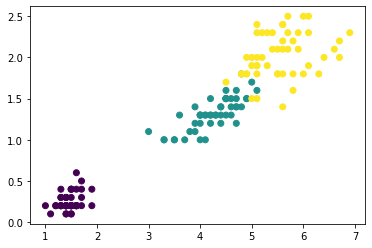

In [5]:
import matplotlib.pyplot as plt
#clusters = [n.value for n in c_iris.tree.nodes()]
clusters = [n for n in df_iris_orig["species"]]
unique = np.unique(clusters)
colors = {}
for i, u in enumerate(unique):
    colors[u] = i
plt.scatter(df_iris["petal_length"],df_iris["petal_width"],c=df_iris_orig["species"].map(colors))


In [6]:

x, y = np.meshgrid(np.linspace(1,7,101),np.linspace(0,2.5,101))
col = []
for i in range(len(x.ravel())):
    d = df_iris.iloc[120].copy()
    d["petal_length"] = x.ravel()[i]
    d["petal_width"] = y.ravel()[i]
    col.append(c_iris.tree.traverse(d).value)
unique = [u for u in np.unique(col)]
for i, c in enumerate(col):
    col[i] = unique.index(c)
z = np.array(col).reshape(x.shape)

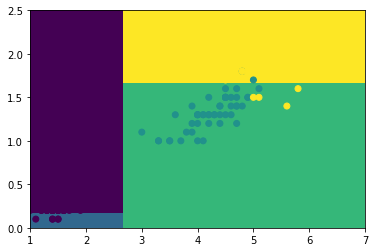

In [7]:
fig, ax = plt.subplots()
ax.pcolormesh(x,y,z)
ax.scatter(df_iris["petal_length"],df_iris["petal_width"],c=df_iris_orig["species"].map(colors))

In [8]:
import binarybeech.utils
binarybeech.utils.print_tree(c_iris.tree)

petal_length<2.64
├── False:petal_width<1.66
│   ├── False:cluster eede2f67-294d-4ea2-9b26-4d996292c01b
│   └── True: cluster b55ecf6b-f968-44d2-94d1-48d61693fde3
└── True: petal_width<0.18
    ├── False:cluster 70a42050-bd78-436c-9469-eaab9507d1ad
    └── True: cluster a0753bec-da12-4989-901f-ca5817e158da



In [9]:
c_iris.validate()

{}